In [1]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm_notebook
from itertools import product
from typing import Union

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


In [2]:
data = pd.read_csv('Data.csv')
print(data.tail())




    NO  export
32  33      49
33  34     101
34  35     151
35  36     204
36  37      51


In [3]:
#copy data untuk seasionalnya
data2 = data.copy()
print(data2.tail())

    NO  export
32  33      49
33  34     101
34  35     151
35  36     204
36  37      51


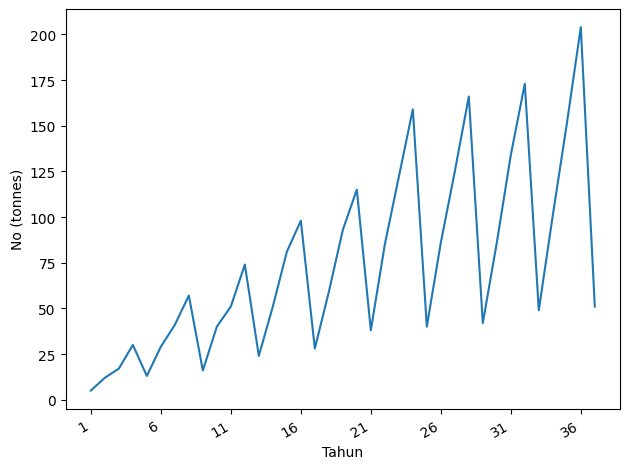

In [4]:
#hasil ((2026-1961)/5 harus sama dengan ((65-0)/5)), agar grafik dapat ditampilkan. nilai bisa diatur u menyesuaikan garis 


fig, ax = plt.subplots()

ax.plot(data['export'])
ax.set_xlabel('Tahun')
ax.set_ylabel('No (tonnes)')

plt.xticks(np.arange(0, 40, 5), np.arange(1, 40, 5))

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('time series plot.png', dpi=300)

In [5]:
ad_fuller_result = adfuller(data['export'])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')


ADF Statistic: -1.1062675843687797
p-value: 0.7125660036862862


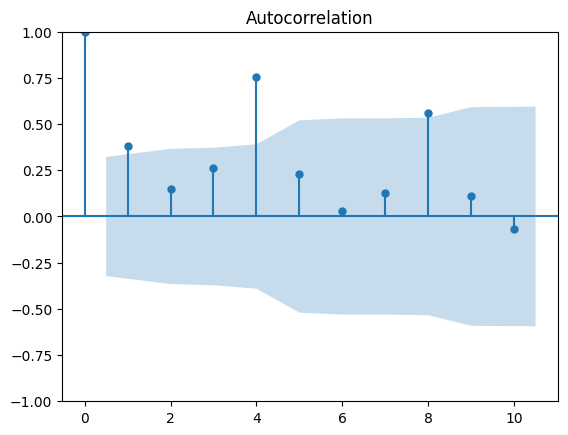

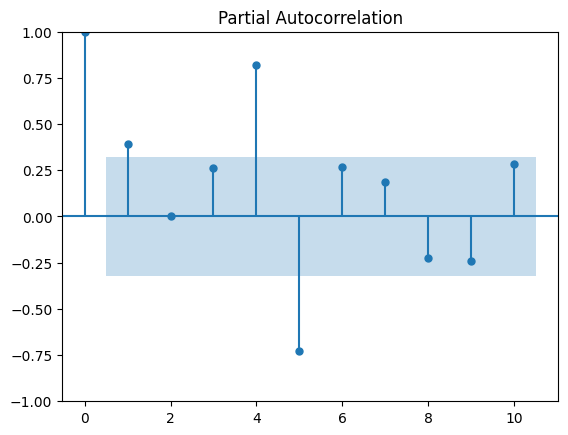

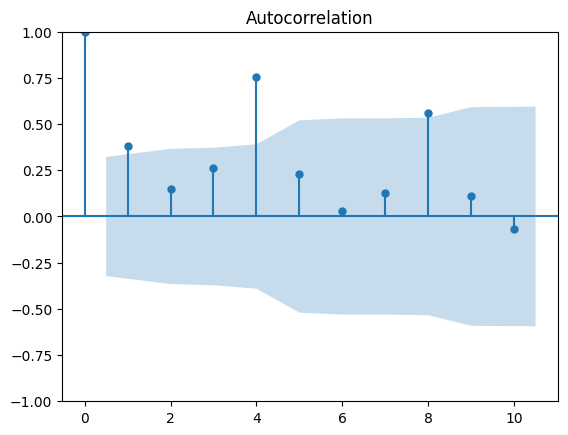

In [6]:
plot_pacf(data['export'],lags=10)
plot_acf(data['export'], lags=10)

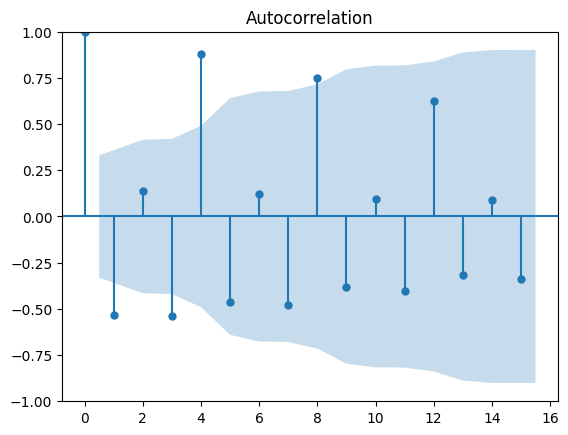

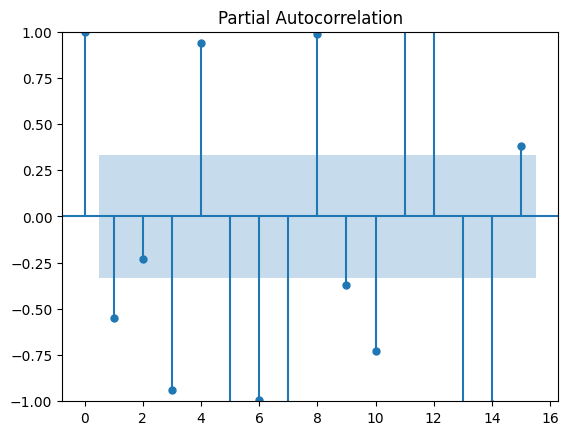

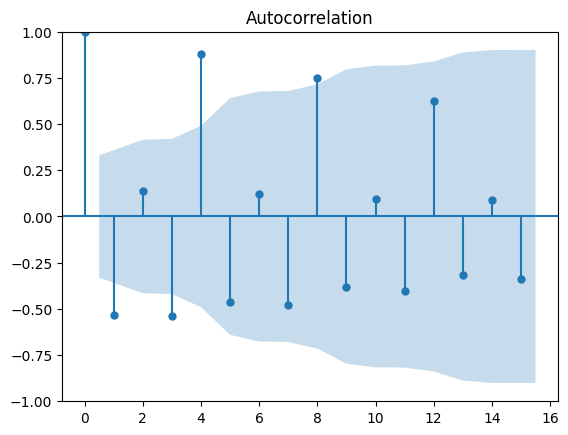

In [9]:
#data['export'] = np.log(data['export'])
data['export'] = data['export'].diff()

data = data.drop(data.index[0])

plot_pacf(data['export'], lags=15)
plot_acf(data['export'], lags=15)

In [10]:

ad_fuller_result = adfuller(data['export'])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -6.043601467315969
p-value: 1.327956972472904e-07


In [11]:
#olah data2 untuk seasionalnya
data2['export'] = np.log(data2['export'])
data2['export'] = data2['export'].diff(periods=4)

data2 = data2.drop(data2.index[0])



In [12]:
#ada data Nan akibat differencing musiman
print(data2.head())


   NO    export
1   2       NaN
2   3       NaN
3   4       NaN
4   5  0.955511
5   6  0.882389


In [13]:
#sedangkan di differencing pertama untuk trend tidak ada
print(data.head())

   NO    export
2   3 -0.527162
3   4  0.219677
4   5 -1.404232
5   6  1.638594
6   7 -0.456070


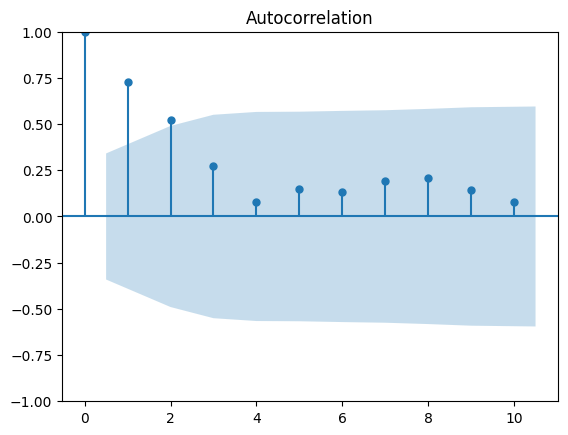

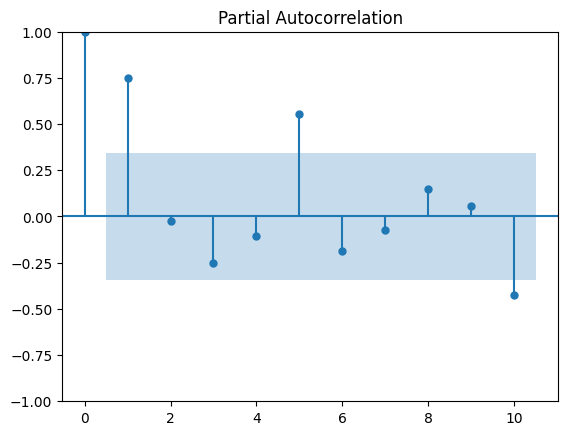

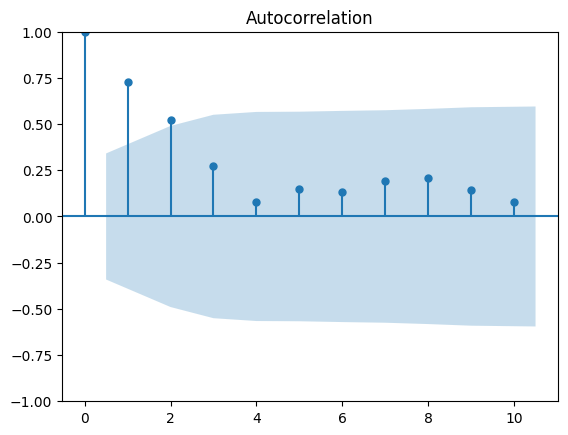

In [14]:
#menghilangkan row yang ada Nan dulu, baru cek acf pacfnya (musiman)
data2 = data2.dropna()
plot_pacf(data2['export'], lags=10)
plot_acf(data2['export'], lags=10)

In [15]:
ad_fuller_result = adfuller(data2['export'])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')


ADF Statistic: -2.979012565469927
p-value: 0.03690139184707009
